In [1]:
from trackeddy.trackeddy import *
import matplotlib.pyplot as plt
import cmocean as cm

In [2]:
path = '/Users/jmtzmo/Downloads/sla_snapshot_KEx.nc'

TEddy = TrackEddy(path=path,variable='sla')

In [3]:
TEddy.rawdata = TEddy.rawdata.where(TEddy.rawdata < 1e10, np.nan ).sel(lon=slice(141,180))
TEddy.X,TEddy.Y = np.meshgrid(TEddy.rawdata.lon,TEddy.rawdata.lat)

In [4]:
TEddy.filter=None

In [5]:
TEddy._filter_data_(TEddy.rawdata,filter=None)

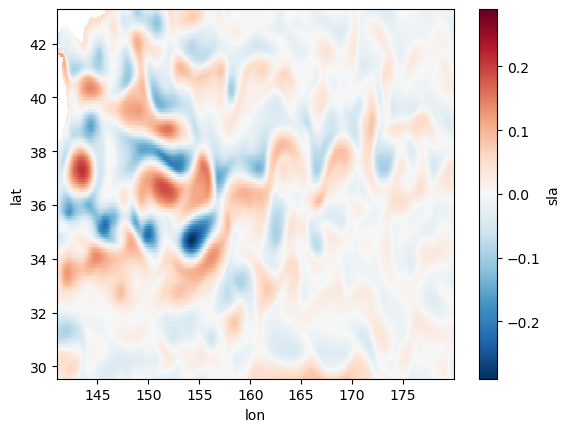

In [6]:
TEddy.data2track.plot()

In [7]:
positive_levels = np.round(np.hstack((np.arange(0.015,0.05,0.001), np.linspace(0.05,0.2,10))),3)
3
negative_levels = - np.flipud(positive_levels)

levels = np.hstack((negative_levels,positive_levels))

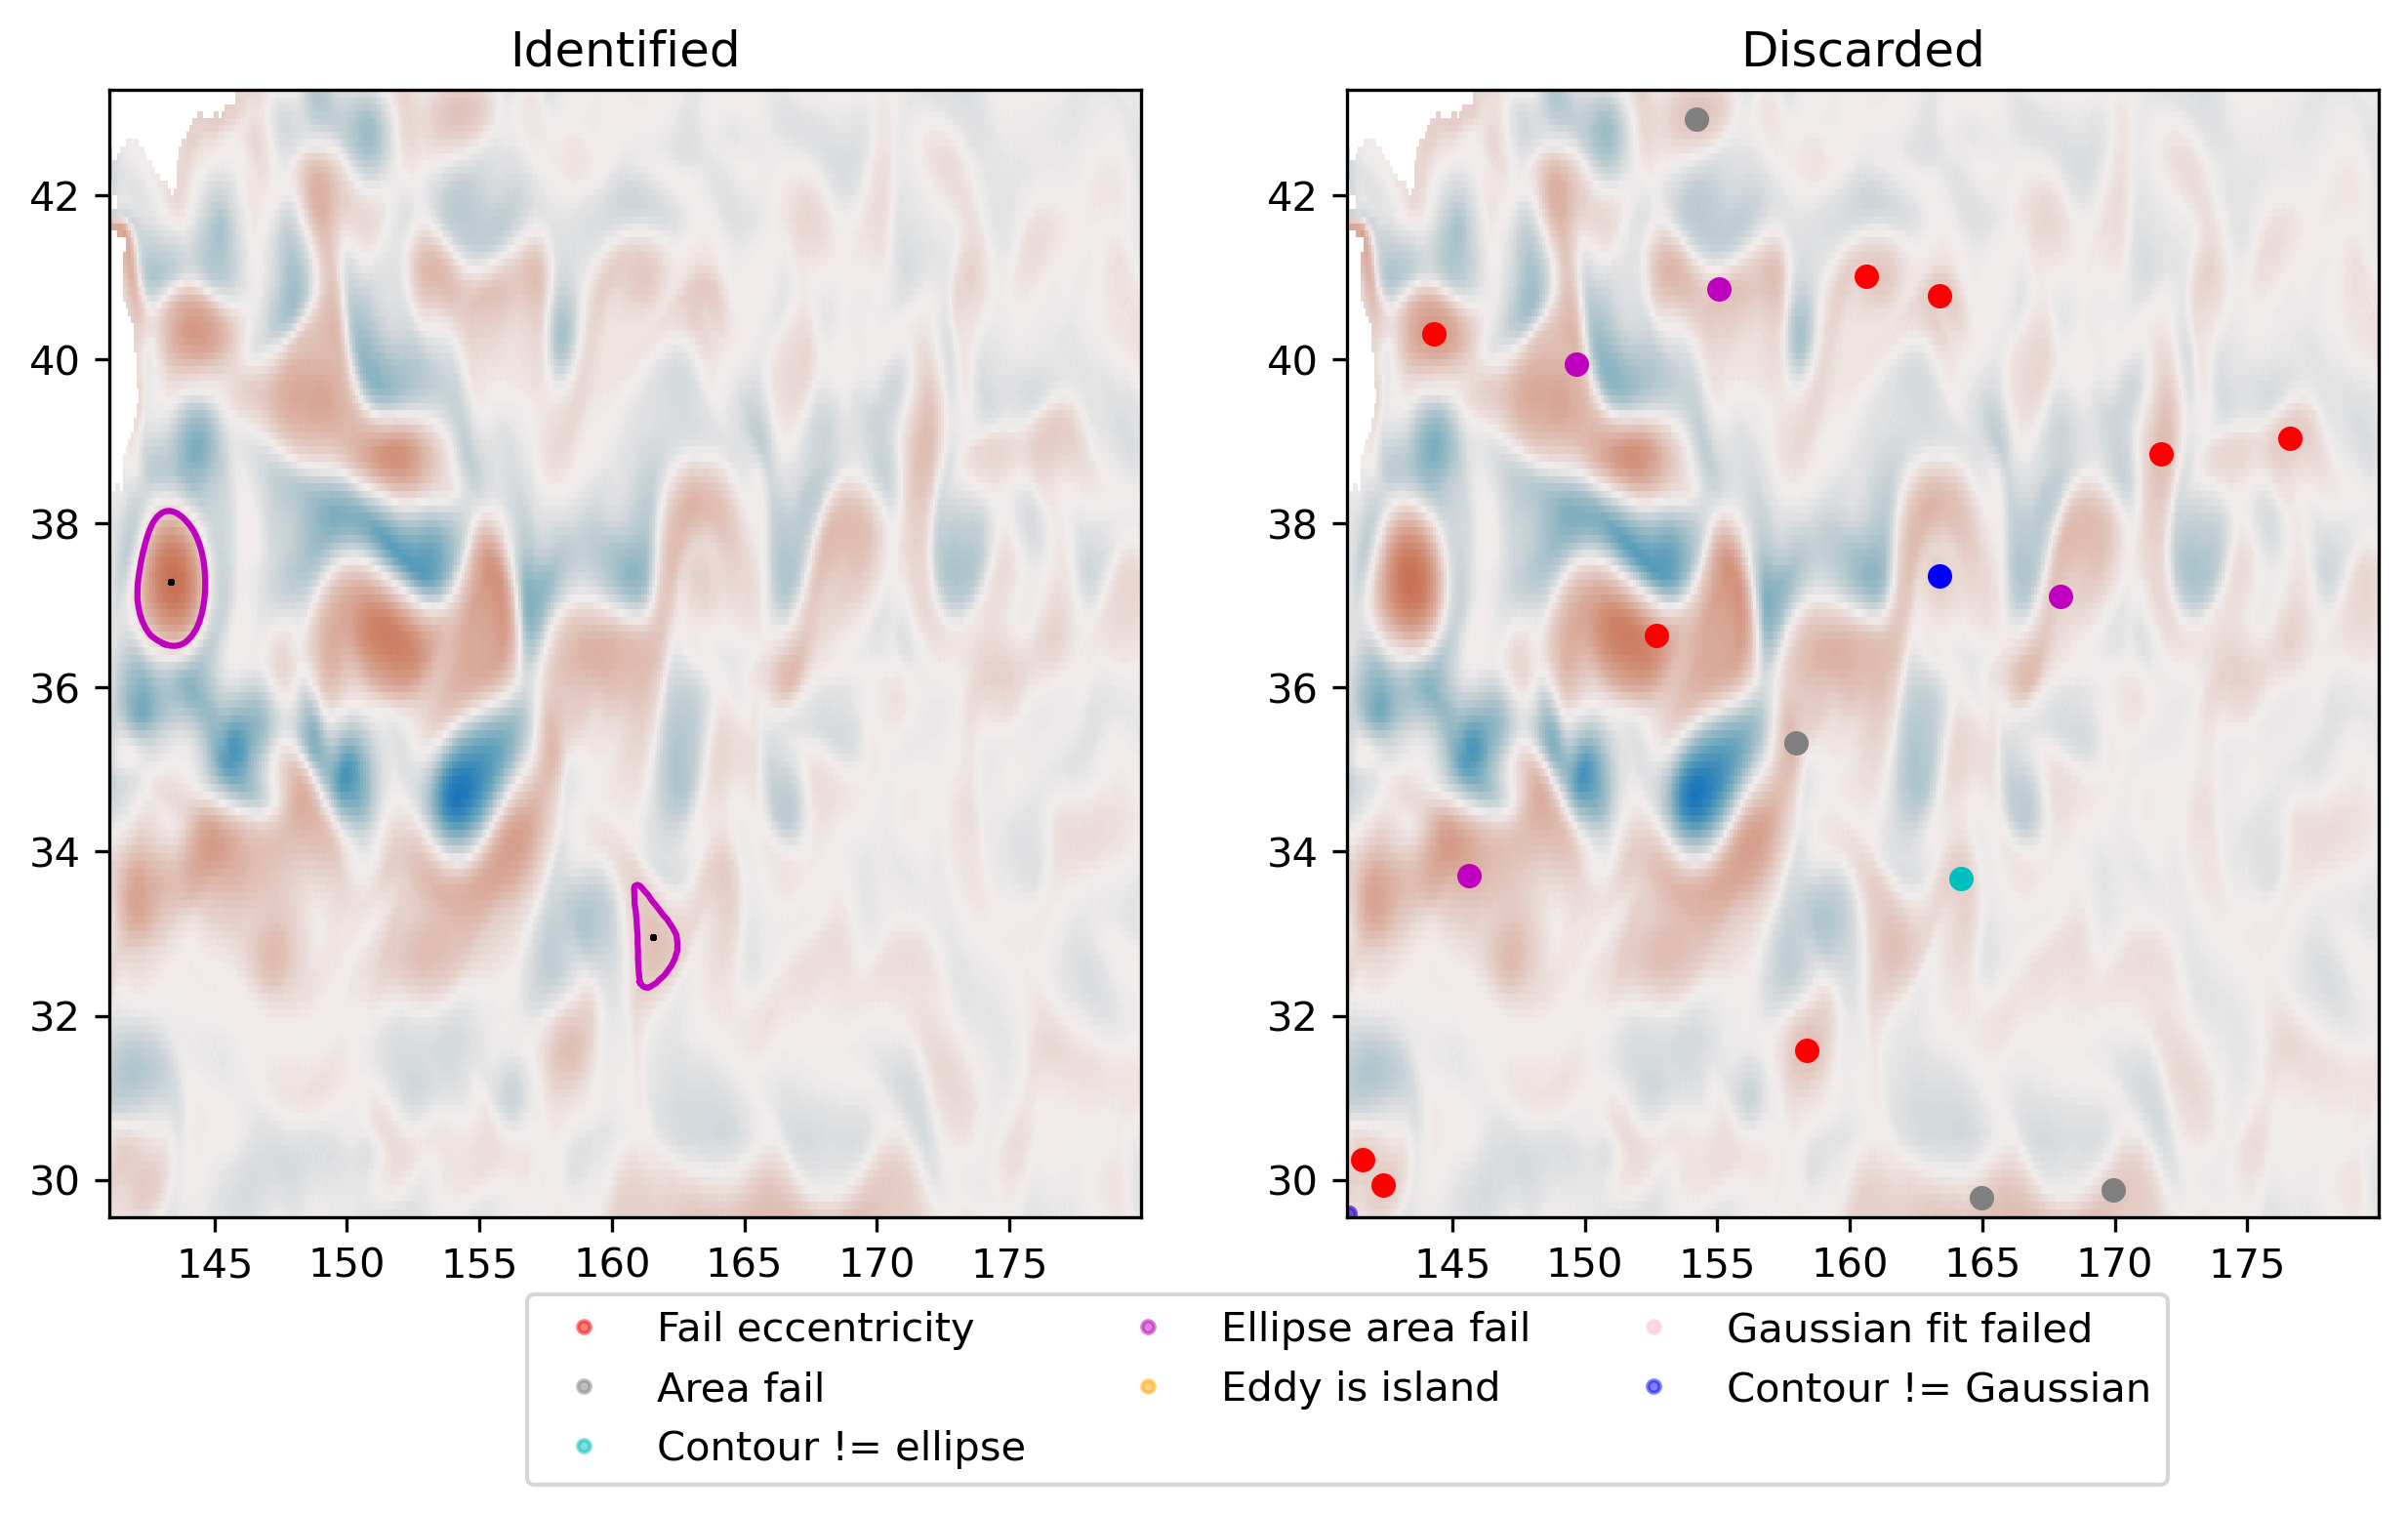

In [8]:
plot_args = {'alpha':1,'markersize':10}

# for level in levels:
level = 0.05
eddies, discarded = TEddy._detect_one_level(level)
TEddy.plot_eddy_detection_in_level(eddies, discarded, **plot_args)

#     plt.show()
    

In [9]:

df_eddy_multilevel_store = TEddy._detect_snapshot(0,levels)


In [10]:
df_eddy_multilevel_store

contour_path_x  contour_path_y  level     area_eddy  \
identifier index                                                        
0          0          149.856903       34.757179   -0.2   1526.528206   
           1          149.783768       34.778457   -0.2   1526.528206   
           2          149.756017       34.800287   -0.2   1526.528206   
           3          149.712907       34.871957   -0.2   1526.528206   
           4          149.732821       34.965361   -0.2   1526.528206   
...                          ...             ...    ...           ...   
52         74         154.115294       36.263010    0.1  24818.180719   
           75         154.137867       36.170941    0.1  24818.180719   
           76         154.195974       36.079651    0.1  24818.180719   
           77         154.196534       36.078776    0.1  24818.180719   
           78         154.296901       36.033041    0.1  24818.180719   

                  radius_eddy  ellipse_params_a  ellipse_params_b  \
identifier index                                                    
0          0        22.043344          0.279921          0.177041   
           1        22.043344          0.279921          0.177041   
           2        22.043344          0.279921          0.177041   
           3        22.043344          0.279921          0.177041   
           4        22.043344          0.279921          0.177041   
...                       ...               ...               ...   
52         74       88.881226          1.093314          0.791344   
           75       88.881226          1.093314          0.791344   
           76       88.881226          1.093314          0.791344   
           77       88.881226          1.093314          0.791344   
           78       88.881226          1.093314          0.791344   

                  ellipse_params_theta  contour_ellipse_error  ellipse_eccen  \
identifier index                                                               
0          0                  0.142978                 0.5431       0.774586   
           1                  0.142978                 0.5431       0.774586   
           2                  0.142978                 0.5431       0.774586   
           3                  0.142978                 0.5431       0.774586   
           4                  0.142978                 0.5431       0.774586   
...                                ...                    ...            ...   
52         74                 0.628497                 0.4591       0.690006   
           75                 0.628497                 0.4591       0.690006   
           76                 0.628497                 0.4591       0.690006   
           77                 0.628497                 0.4591       0.690006   
           78                 0.628497                 0.4591       0.690006   

                  ...  eddy_sign    maxima   maxima_y    maxima_x  \
identifier index  ...                                               
0          0      ...       -1.0 -0.223278  34.965361  149.957791   
           1      ...       -1.0 -0.223278  34.965361  149.957791   
           2      ...       -1.0 -0.223278  34.965361  149.957791   
           3      ...       -1.0 -0.223278  34.965361  149.957791   
           4      ...       -1.0 -0.223278  34.965361  149.957791   
...               ...        ...       ...        ...         ...   
52         74     ...        1.0  0.155574  37.360417  155.508073   
           75     ...        1.0  0.155574  37.360417  155.508073   
           76     ...        1.0  0.155574  37.360417  155.508073   
           77     ...        1.0  0.155574  37.360417  155.508073   
           78     ...        1.0  0.155574  37.360417  155.508073   

                  gaussian_params_x  gaussian_params_y  \
identifier index                                         
0          0             149.988274          34.926263   
           1             149.988274          34.926263   

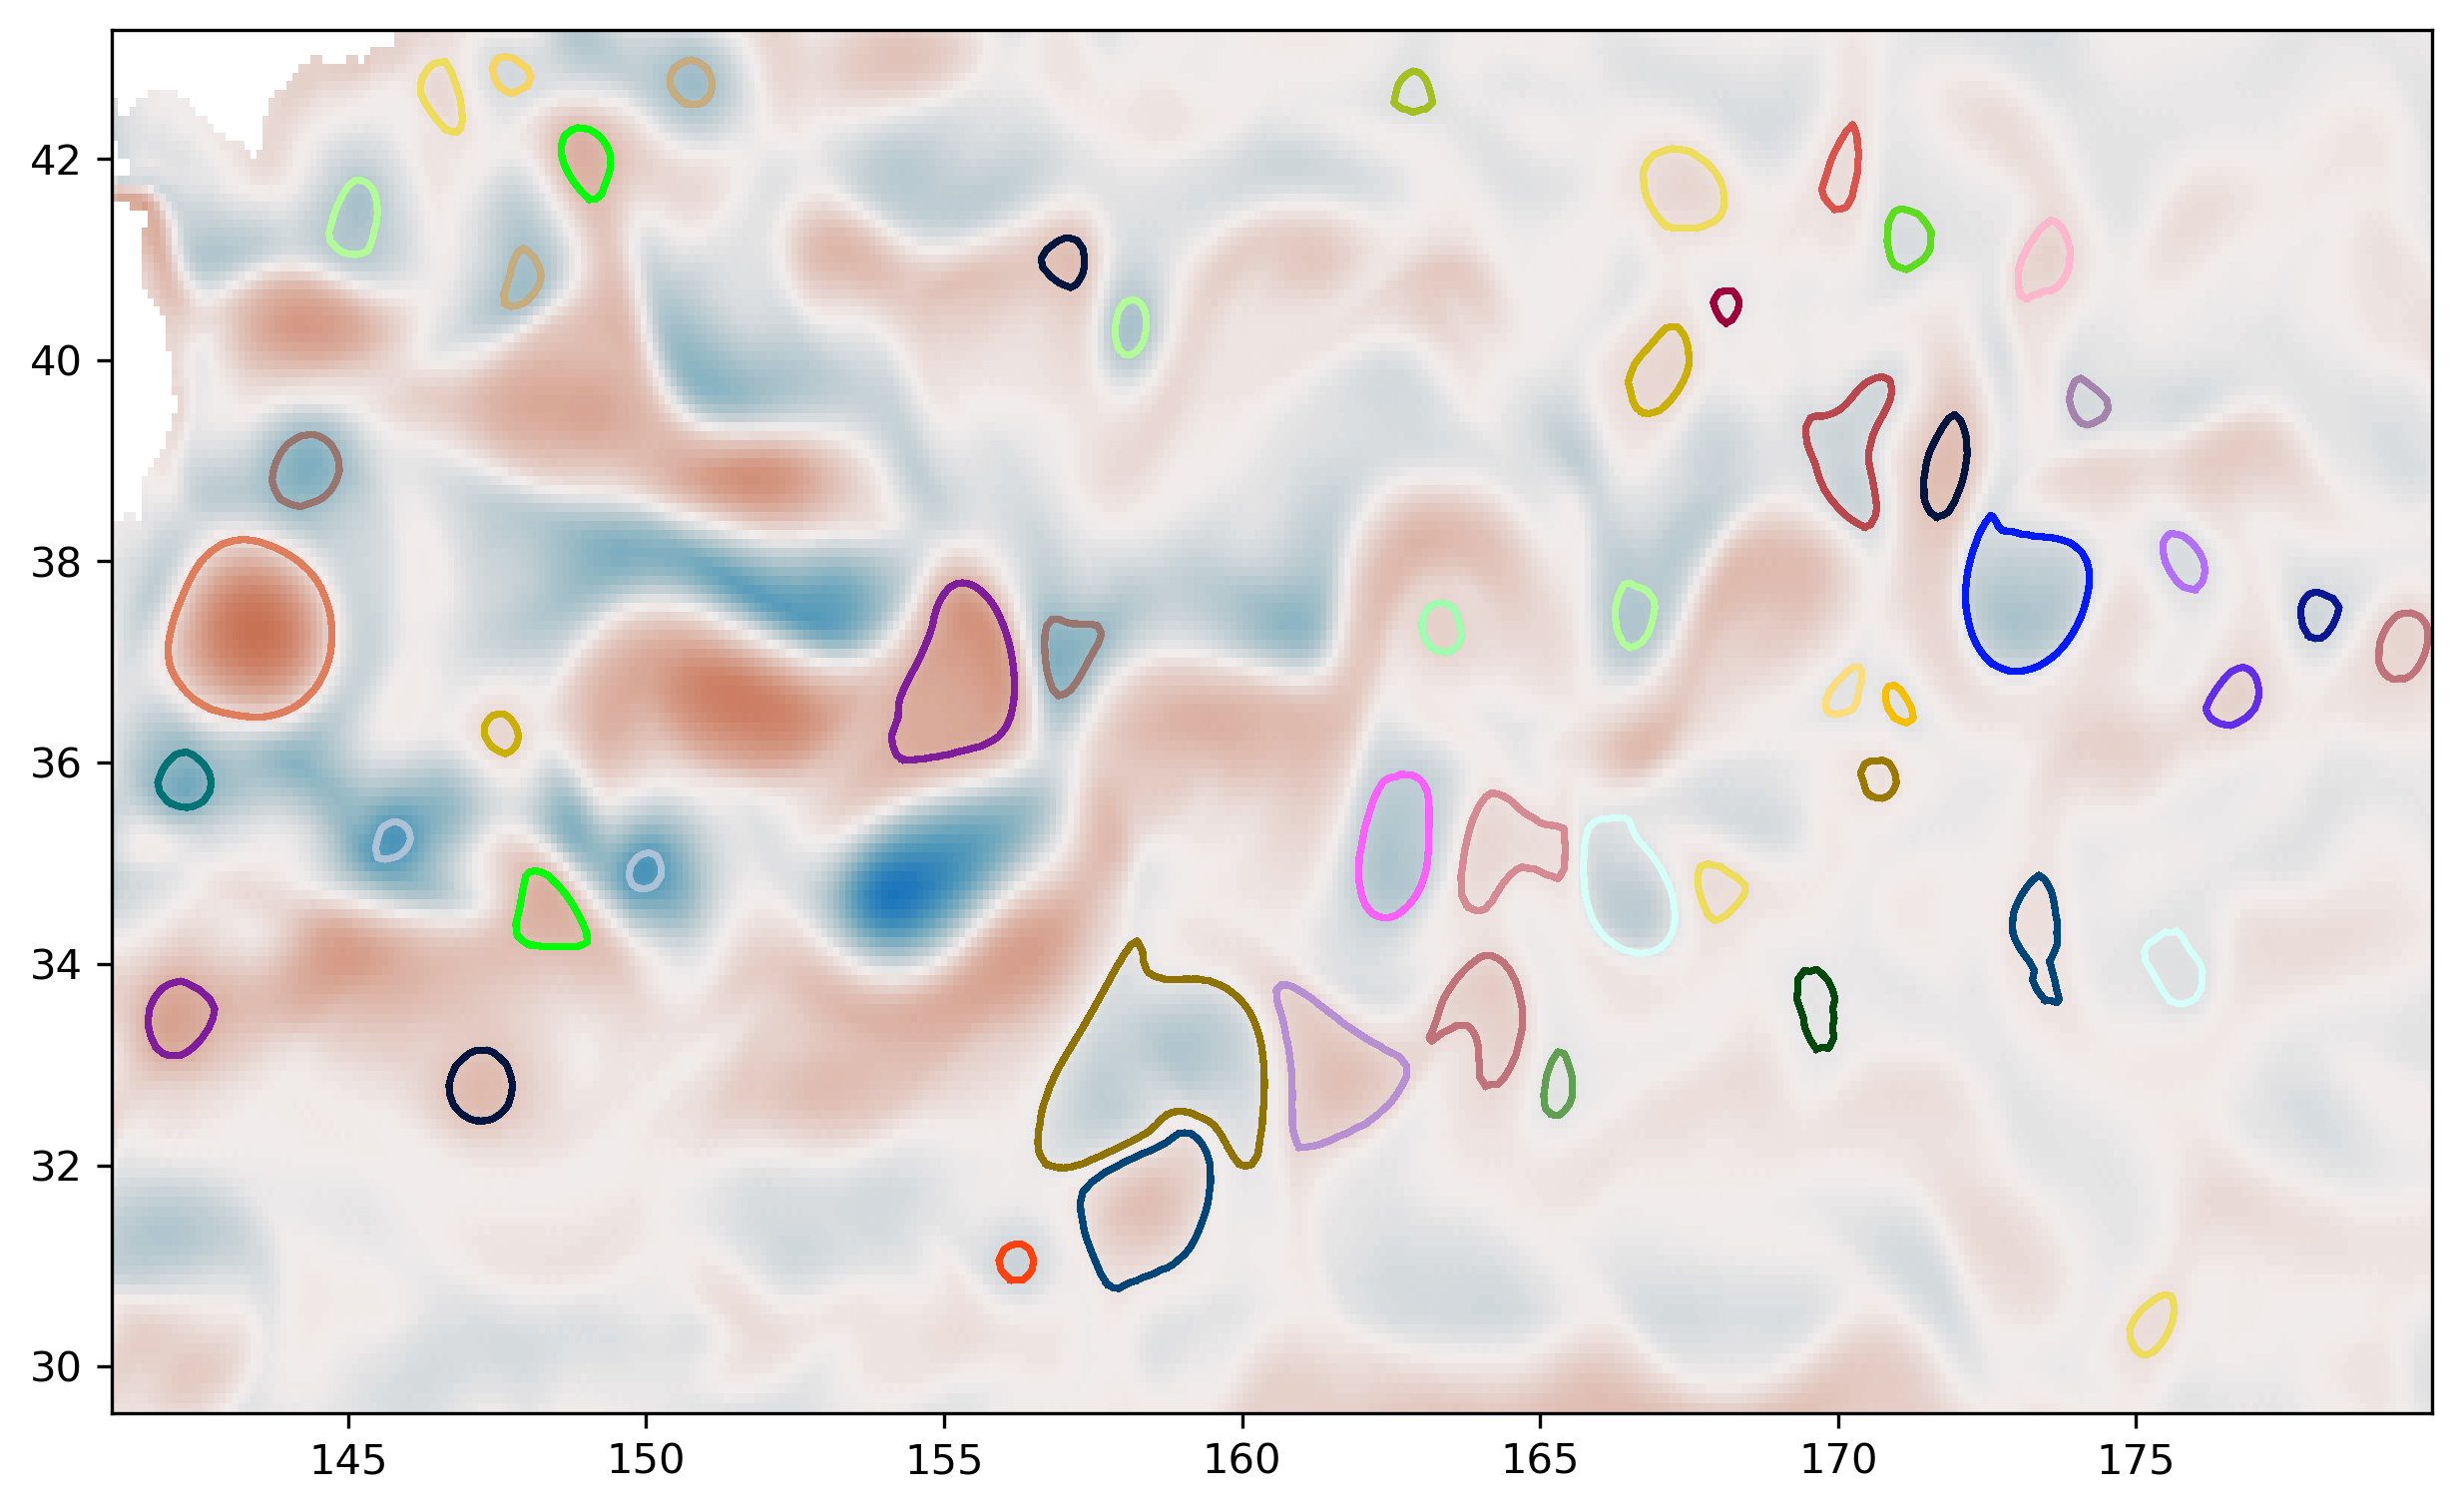

In [11]:
TEddy.plot_eddy_detection_multilevel(df_eddy_multilevel_store)

In [24]:
TEddy.identification_criteria['eccentricity'] = 0.95 # 1 
TEddy.identification_criteria['ellipse_fit'] = 0.85 # 
TEddy.identification_criteria['gaussian_fit'] = 0.5

In [22]:
df_eddy_multilevel_store = TEddy._detect_snapshot(0,levels)

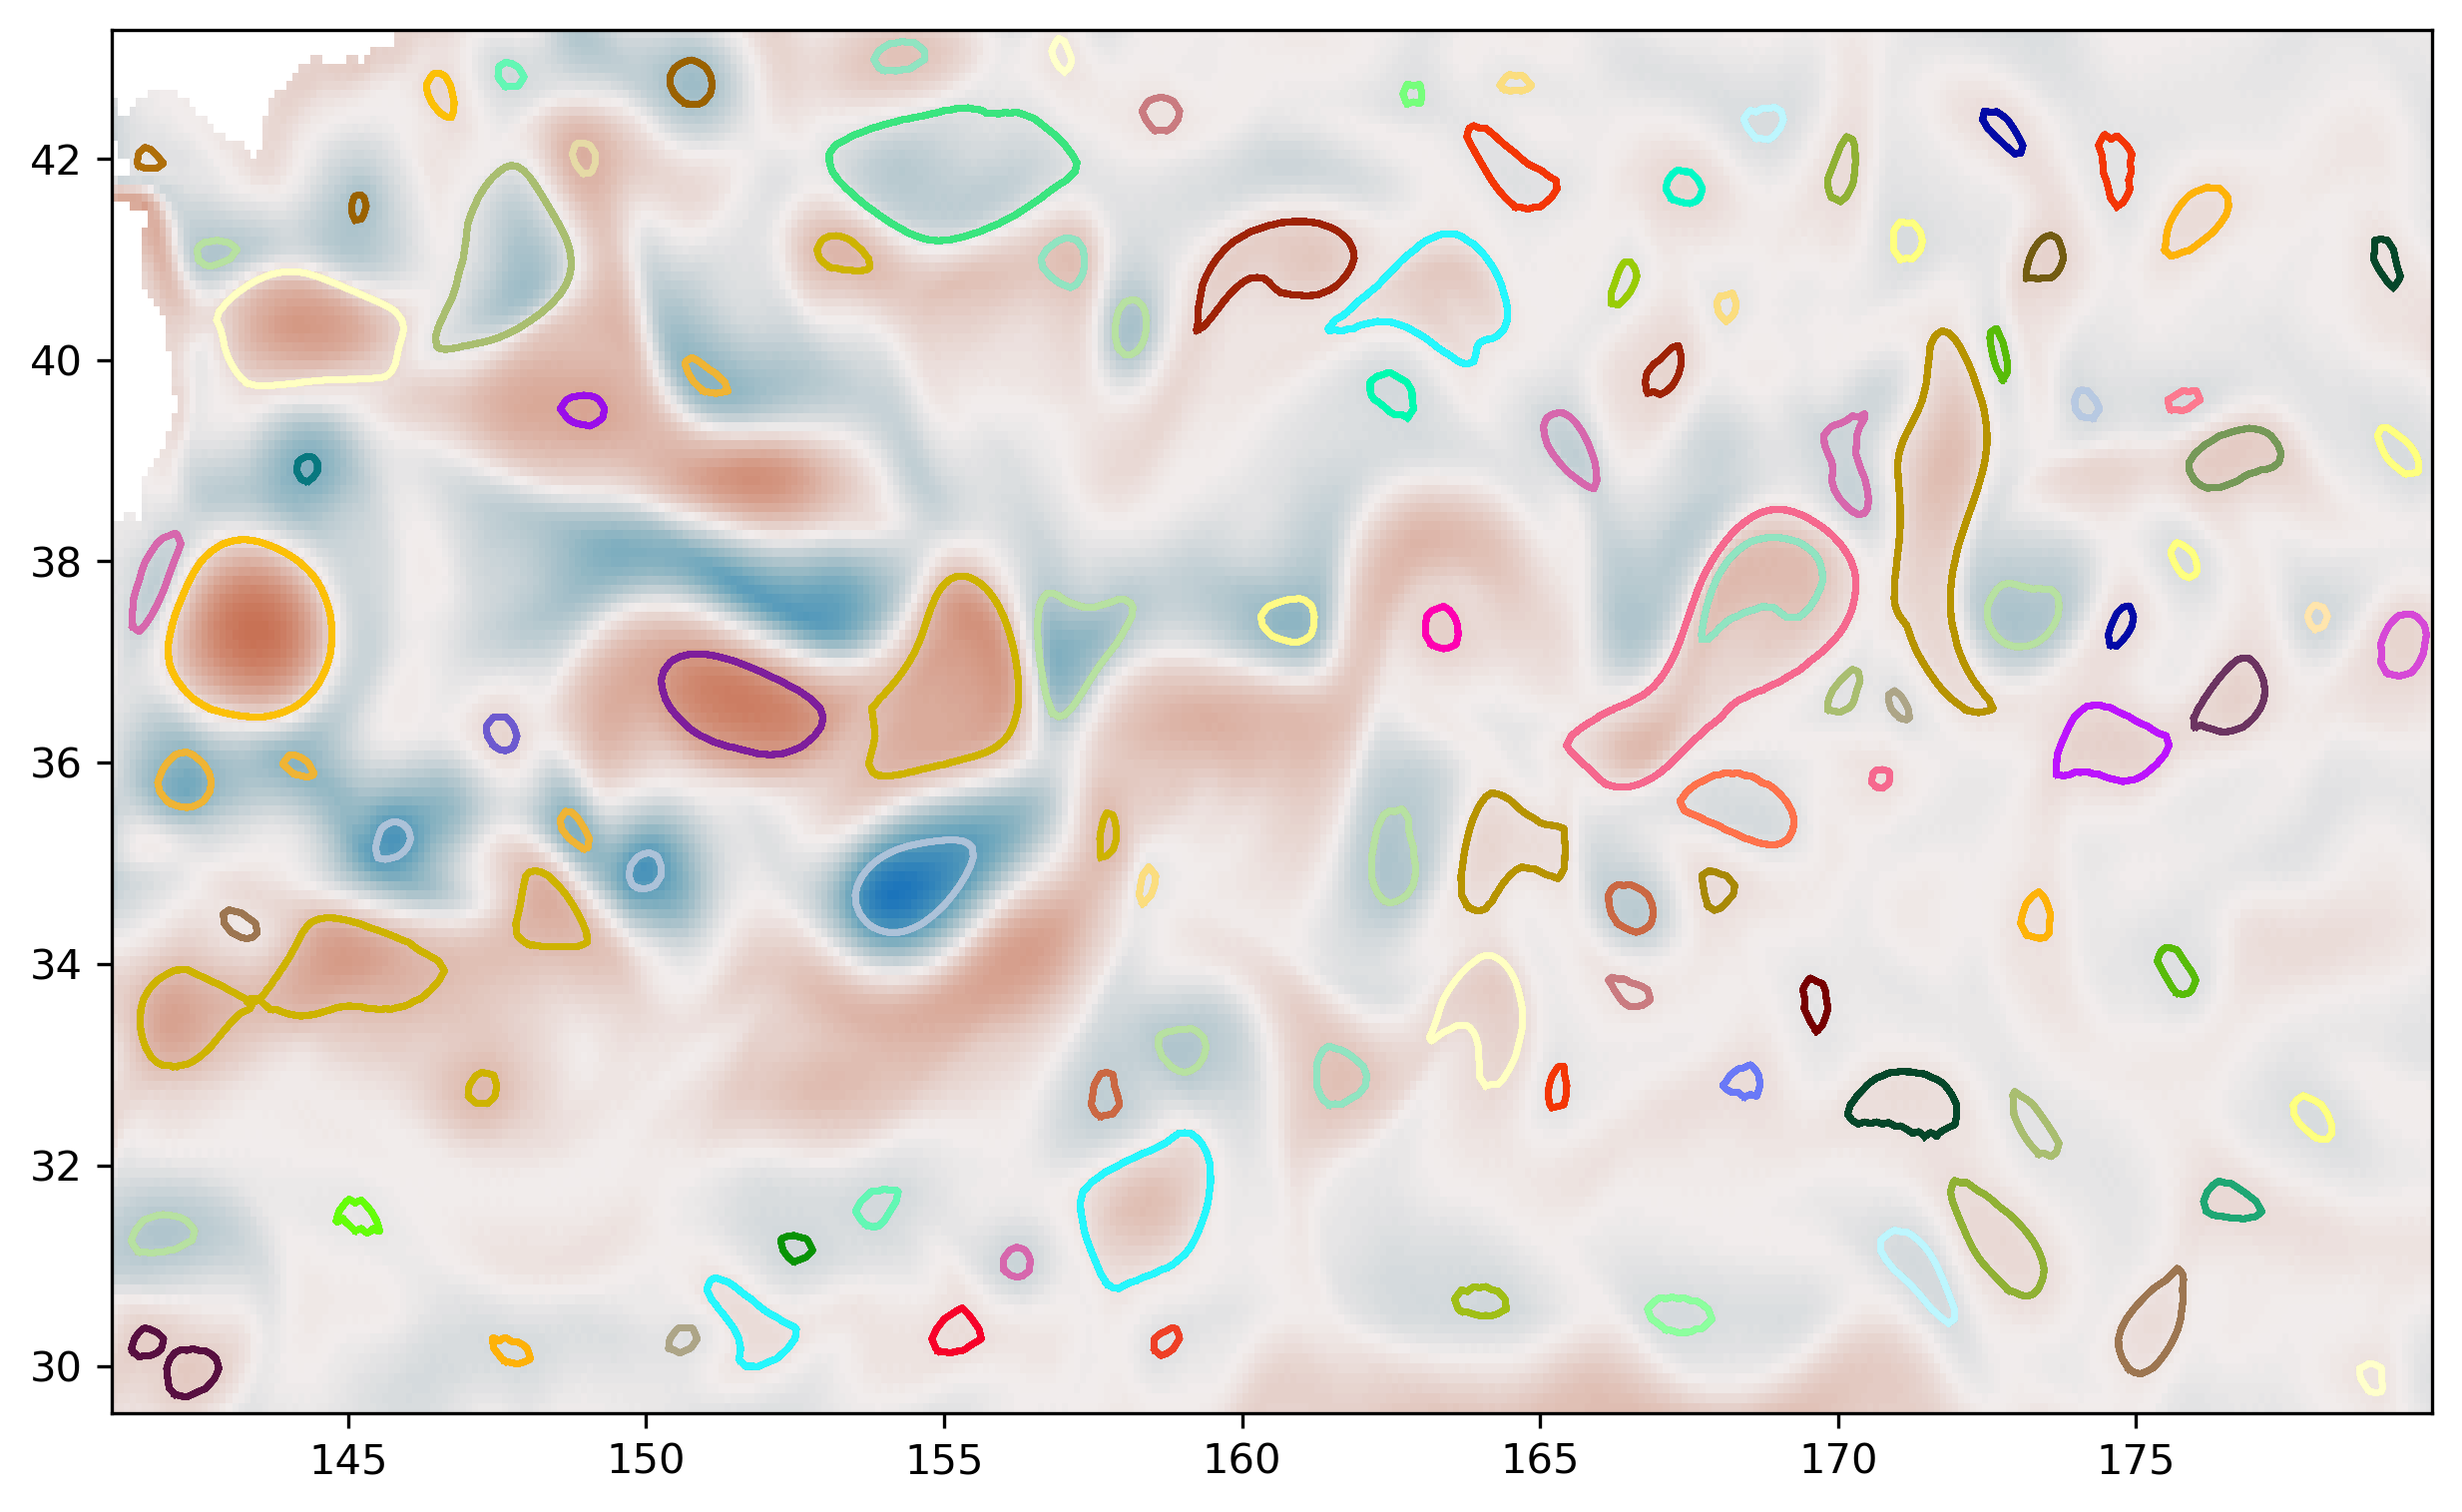

In [23]:
TEddy.plot_eddy_detection_multilevel(df_eddy_multilevel_store)
# plt.gca().set_box_aspect(1)